In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
train_dir = "train" 
test_dir = "test"   

In [3]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

C:\Users\shivani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
img_size=48

In [5]:
img_size=48
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [7]:
model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [8]:
epochs = 20
batch_size = 64

In [9]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

C:\Users\shivani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 452s 1s/step - accuracy: 0.2083 - loss: 2.2746 - val_accuracy: 0.2493 - val_loss: 2.1009
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 446s 1s/step - accuracy: 0.2819 - loss: 1.8423 - val_accuracy: 0.2828 - val_loss: 1.8398
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 525s 1s/step - accuracy: 0.3815 - loss: 1.6030 - val_accuracy: 0.3701 - val_loss: 1.6179
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 1347s 4s/step - accuracy: 0.4572 - loss: 1.4027 - val_accuracy: 0.3925 - val_loss: 1.7978
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 1352s 4s/step - accuracy: 0.5043 - loss: 1.2952 - val_accuracy: 0.5349 - val_loss: 1.2660
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 453s 1s/step - accuracy: 0.5320 - loss: 1.2220 - val_accuracy: 0.5587 - val_loss: 1.1392
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.5479 - loss: 1.1893 - val_accuracy: 0.5677 - val_loss: 1.1101
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 433s 1s/step - accuracy: 0.5603 - loss: 1.1534 - val_ac

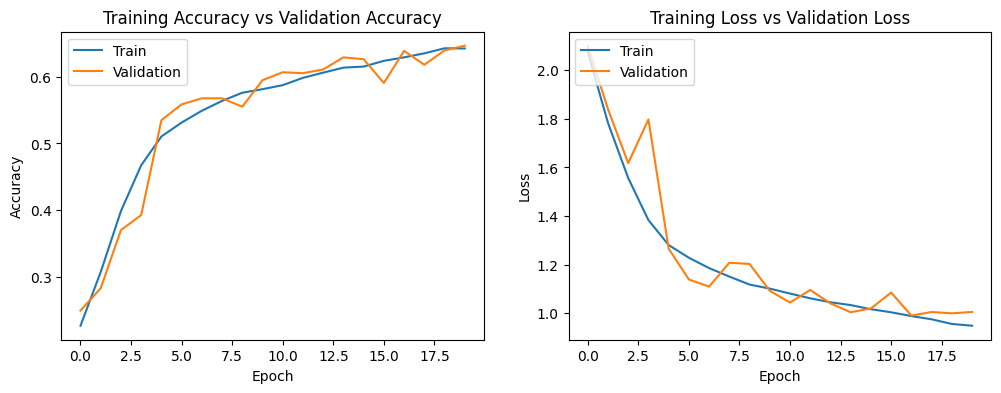

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [26]:
model.save("face_emotion_model.keras")

In [32]:
model.export("face_emotion_model_savedmodel")

INFO:tensorflow:Assets written to: face_emotion_model_savedmodel\assets


INFO:tensorflow:Assets written to: face_emotion_model_savedmodel\assets


Saved artifact at 'face_emotion_model_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1903119416688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903119749488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903119757936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903119754064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903119759520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903119758640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903119758816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903119760048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904246313680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903120021312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903120016912: TensorSp